In [53]:
import pandas as pd


In [54]:
df = pd.read_csv("D:/general volume D/sample datasets/spam_dection_dataset/spam.csv", encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [56]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [57]:
#dropping nan columns
df = df.drop(columns= df.columns[2:5])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
#renaming columns
df.columns = ['category', 'message']
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df.isnull().sum()#no null values

category    0
message     0
dtype: int64

In [60]:
data = pd.get_dummies(df['category'], drop_first = True)
data.head()


,spam
0,False
1,False
2,True
3,False
4,False


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns 

Text(0.5, 1.0, 'Category Distribution')

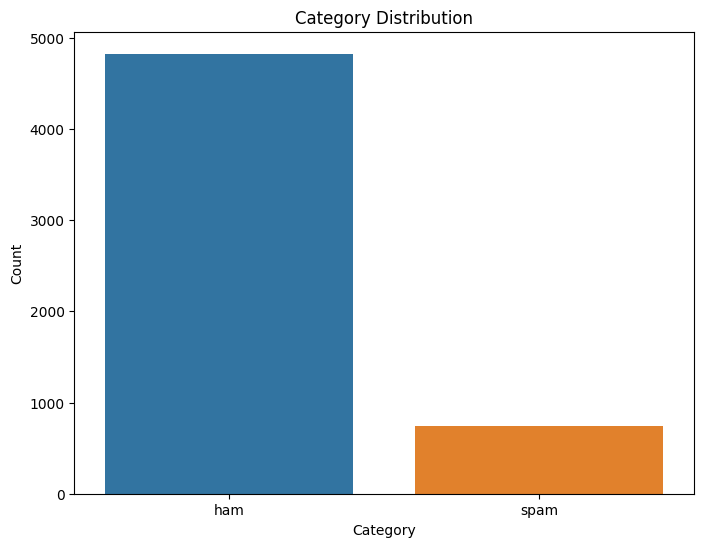

In [62]:
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(x='category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')


In [63]:
df['spam'] = df['category'].apply(lambda x: 1 if x =='spam' else 0)
df

,category,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [64]:
from sklearn.model_selection import train_test_split
X = df['message']
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: int64


In [66]:
from sklearn.feature_extraction.text import CountVectorizer


In [67]:
import numpy as np
vector = CountVectorizer()
#X_train = X_train.astype(str)  # Convert labels to strings
#X_train = X_train.dropna()  # Remove rows with empty messages


X_train_vector = vector.fit_transform(X_train.values)


In [68]:
X_train_vector

<4457x7636 sparse matrix of type '<class 'numpy.int64'>'
	with 59138 stored elements in Compressed Sparse Row format>

In [69]:
print(y_train.shape)
print(X_train_vector.shape)

(4457,)
(4457, 7636)


In [70]:
print(y_train.shape, X_train_vector.shape, X_train.shape)

(4457,) (4457, 7636) (4457,)


In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
nb = MultinomialNB()


nb.fit(X_train_vector, y_train)

MultinomialNB()

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_test_count = vector.transform(X_test)
nb.score(X_test_count, y_test)

0.9838565022421525